# 2D Optics Tutorial: Interband absorption spectrum of a GaAs cylindrical quantum wire

**Authors: Naoki Mitsui (simulation), Brandon Loke (write-up and visualisations)**

This tutorial calculates the optical spectrum of a GaAs cylindrical quantum wire with infinite barriers.


In [1]:
import nextnanopy as nn
import numpy as np
import matplotlib.pyplot as plt
import os, pathlib
import re
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

## Initialise the filepaths

We need both kp8 and single band calculations to plot the figures. The variables have been changed in their respective inputfiles.

In [2]:
inputpath_kp8 = r'C:\Program Files\nextnano\2025_12_20\nextnano++\examples\quantum_wires\2Dcircular_infinite_wire_GaAs_inter_nnp.nnp'
inputfile_kp8 = nn.InputFile(inputpath_kp8)
inputfile_single = nn.InputFile(inputpath_kp8)
inputfile_single.set_variable("KP8", 0)
inputfile_single.set_variable("SINGLE_BAND", 1)
inputfile_single.save(temp=True)

'C:\\Users\\Heorhii\\AppData\\Local\\Temp\\tmpu5sx6dad\\2Dcircular_infinite_wire_GaAs_inter_nnp_0.nnp'

In [3]:
software = inputfile_kp8.product
software

'nextnano++'

In [4]:
inputfile_kp8.execute(show_log=False) # change to True to debug

{'process': <Popen: returncode: 0 args: '"C:\\Program Files\\nextnano\\2025_12_20\\nextn...>,
 'outputdirectory': 'C:\\Users\\Heorhii\\Documents\\nextnano\\OutputNnpy\\2Dcircular_infinite_wire_GaAs_inter_nnp',
 'filename': '2Dcircular_infinite_wire_GaAs_inter_nnp',
 'logfile': 'C:\\Users\\Heorhii\\Documents\\nextnano\\OutputNnpy\\2Dcircular_infinite_wire_GaAs_inter_nnp\\2Dcircular_infinite_wire_GaAs_inter_nnp.log',
 'cmd': '"C:\\Program Files\\nextnano\\2025_12_20\\nextnano++\\bin\\nextnano++_Intel_64bit.exe" --license "C:\\Users\\Heorhii\\Documents\\nextnano\\License\\License_nnp.lic" --database "C:\\Users\\Heorhii\\source\\Workspaces\\nextnanoplus\\nextnano\\database\\database.nnp" --threads 0 --outputdirectory "C:\\Users\\Heorhii\\Documents\\nextnano\\OutputNnpy\\2Dcircular_infinite_wire_GaAs_inter_nnp" --noautooutdir "C:\\Program Files\\nextnano\\2025_12_20\\nextnano++\\examples\\quantum_wires\\2Dcircular_infinite_wire_GaAs_inter_nnp.nnp"',
 'wdir': 'C:\\Program Files\\nextnano\\20

   12 (hole) -> 21 (electron) - reliable to 2.38860916 eV - absorption
   12 (hole) -> 22 (electron) - reliable to 2.42059692 eV - absorption
   12 (hole) -> 23 (electron) - reliable to 2.44209144 eV - absorption
   12 (hole) -> 24 (electron) - reliable to 2.50546725 eV - absorption
   12 (hole) -> 25 (electron) - reliable to 2.53809591 eV - absorption
   12 (hole) -> 26 (electron) - reliable to 2.55005623 eV - absorption
   12 (hole) -> 27 (electron) - reliable to 2.57839891 eV - absorption
   12 (hole) -> 28 (electron) - reliable to 2.69199221 eV - absorption
   12 (hole) -> 29 (electron) - reliable to 2.70438956 eV - absorption
   12 (hole) -> 30 (electron) - reliable to 2.73799923 eV - absorption
   13 (hole) -> 16 (electron) - reliable to 2.16921294 eV - absorption
   13 (hole) -> 17 (electron) - reliable to 2.24047119 eV - absorption
   13 (hole) -> 18 (electron) - reliable to 2.24262961 eV - absorption
   13 (hole) -> 19 (electron) - reliable to 2.27987399 eV - absorption
   13 

   5 (hole) -> 16 (electron) - reliable to 2.30417369 eV - absorption
   5 (hole) -> 17 (electron) - reliable to 2.37543194 eV - absorption
   5 (hole) -> 18 (electron) - reliable to 2.37759036 eV - absorption
   5 (hole) -> 19 (electron) - reliable to 2.41483473 eV - absorption
   5 (hole) -> 20 (electron) - reliable to 2.4277425 eV - absorption
   5 (hole) -> 21 (electron) - reliable to 2.46205497 eV - absorption
   5 (hole) -> 22 (electron) - reliable to 2.49404273 eV - absorption
   5 (hole) -> 23 (electron) - reliable to 2.51553725 eV - absorption
   5 (hole) -> 24 (electron) - reliable to 2.57891306 eV - absorption
   5 (hole) -> 25 (electron) - reliable to 2.61154172 eV - absorption
   5 (hole) -> 26 (electron) - reliable to 2.62350204 eV - absorption
   5 (hole) -> 27 (electron) - reliable to 2.65184471 eV - absorption
   5 (hole) -> 28 (electron) - reliable to 2.76543802 eV - absorption
   5 (hole) -> 29 (electron) - reliable to 2.77783537 eV - absorption
   5 (hole) -> 30 (el

   13 (hole) -> 16 (electron) - reliable to 2.16921294 eV - absorption
   13 (hole) -> 17 (electron) - reliable to 2.24047119 eV - absorption
   13 (hole) -> 18 (electron) - reliable to 2.24262961 eV - absorption
   13 (hole) -> 19 (electron) - reliable to 2.27987399 eV - absorption
   13 (hole) -> 20 (electron) - reliable to 2.29278175 eV - absorption
   13 (hole) -> 21 (electron) - reliable to 2.32709422 eV - absorption
   13 (hole) -> 22 (electron) - reliable to 2.35908198 eV - absorption
   13 (hole) -> 23 (electron) - reliable to 2.3805765 eV - absorption
   13 (hole) -> 24 (electron) - reliable to 2.44395231 eV - absorption
   13 (hole) -> 25 (electron) - reliable to 2.47658098 eV - absorption
   13 (hole) -> 26 (electron) - reliable to 2.4885413 eV - absorption
   13 (hole) -> 27 (electron) - reliable to 2.51688397 eV - absorption
   13 (hole) -> 28 (electron) - reliable to 2.63047728 eV - absorption
   13 (hole) -> 29 (electron) - reliable to 2.64287463 eV - absorption
   13 (h

   5 (hole) -> 26 (electron) - reliable to 2.62350204 eV - absorption
   5 (hole) -> 27 (electron) - reliable to 2.65184471 eV - absorption
   5 (hole) -> 28 (electron) - reliable to 2.76543802 eV - absorption
   5 (hole) -> 29 (electron) - reliable to 2.77783537 eV - absorption
   5 (hole) -> 30 (electron) - reliable to 2.81144504 eV - absorption
   6 (hole) -> 16 (electron) - reliable to 2.29119972 eV - absorption
   6 (hole) -> 17 (electron) - reliable to 2.36245797 eV - absorption
   6 (hole) -> 18 (electron) - reliable to 2.36461639 eV - absorption
   6 (hole) -> 19 (electron) - reliable to 2.40186076 eV - absorption
   6 (hole) -> 20 (electron) - reliable to 2.41476853 eV - absorption
   6 (hole) -> 21 (electron) - reliable to 2.449081 eV - absorption
   6 (hole) -> 22 (electron) - reliable to 2.48106876 eV - absorption
   6 (hole) -> 23 (electron) - reliable to 2.50256328 eV - absorption
   6 (hole) -> 24 (electron) - reliable to 2.56593909 eV - absorption
   6 (hole) -> 25 (ele

   13 (hole) -> 27 (electron) - reliable to 2.51688397 eV - absorption
   13 (hole) -> 28 (electron) - reliable to 2.63047728 eV - absorption
   13 (hole) -> 29 (electron) - reliable to 2.64287463 eV - absorption
   13 (hole) -> 30 (electron) - reliable to 2.67648429 eV - absorption
   14 (hole) -> 16 (electron) - reliable to 2.14659683 eV - absorption
   14 (hole) -> 17 (electron) - reliable to 2.21785507 eV - absorption
   14 (hole) -> 18 (electron) - reliable to 2.22001349 eV - absorption
   14 (hole) -> 19 (electron) - reliable to 2.25725787 eV - absorption
   14 (hole) -> 20 (electron) - reliable to 2.27016563 eV - absorption
   14 (hole) -> 21 (electron) - reliable to 2.3044781 eV - absorption
   14 (hole) -> 22 (electron) - reliable to 2.33646586 eV - absorption
   14 (hole) -> 23 (electron) - reliable to 2.35796038 eV - absorption
   14 (hole) -> 24 (electron) - reliable to 2.42133619 eV - absorption
   14 (hole) -> 25 (electron) - reliable to 2.45396486 eV - absorption
   14 (

{'process': <Popen: returncode: 0 args: '"C:\\Program Files\\nextnano\\2021_12_24\\nextn...>,
 'outputdirectory': 'D:\\nextnano output\\2Dcircular_infinite_well_GaAs_inter_kp8',
 'filename': '2Dcircular_infinite_well_GaAs_inter_kp8',
 'logfile': 'D:\\nextnano output\\2Dcircular_infinite_well_GaAs_inter_kp8\\2Dcircular_infinite_well_GaAs_inter_kp8.log',
 'cmd': '"C:\\Program Files\\nextnano\\2021_12_24\\nextnano++\\bin 64bit\\nextnano++_Intel_64bit.exe" --license "C:\\Users\\brandon.loke\\Documents\\nextnano\\License\\License_nnp.lic" --database "C:\\Program Files\\nextnano\\2021_12_24\\nextnano++\\Syntax\\database_nnp.in" --threads 0 --outputdirectory "D:\\nextnano output\\2Dcircular_infinite_well_GaAs_inter_kp8" --noautooutdir "D:\\nextnano tutorials\\2Dcircular_infinite_well_GaAs_inter\\2Dcircular_infinite_well_GaAs_inter_kp8.in"',
 'wdir': 'C:\\Program Files\\nextnano\\2021_12_24\\nextnano++\\bin 64bit'}

In [5]:
inputfile_single.execute(show_log=False) # change to True to debug

{'process': <Popen: returncode: 0 args: '"C:\\Program Files\\nextnano\\2025_12_20\\nextn...>,
 'outputdirectory': 'C:\\Users\\Heorhii\\Documents\\nextnano\\OutputNnpy\\2Dcircular_infinite_wire_GaAs_inter_nnp_0',
 'filename': '2Dcircular_infinite_wire_GaAs_inter_nnp_0',
 'logfile': 'C:\\Users\\Heorhii\\Documents\\nextnano\\OutputNnpy\\2Dcircular_infinite_wire_GaAs_inter_nnp_0\\2Dcircular_infinite_wire_GaAs_inter_nnp_0.log',
 'cmd': '"C:\\Program Files\\nextnano\\2025_12_20\\nextnano++\\bin\\nextnano++_Intel_64bit.exe" --license "C:\\Users\\Heorhii\\Documents\\nextnano\\License\\License_nnp.lic" --database "C:\\Users\\Heorhii\\source\\Workspaces\\nextnanoplus\\nextnano\\database\\database.nnp" --threads 0 --outputdirectory "C:\\Users\\Heorhii\\Documents\\nextnano\\OutputNnpy\\2Dcircular_infinite_wire_GaAs_inter_nnp_0" --noautooutdir "C:\\Users\\Heorhii\\AppData\\Local\\Temp\\tmpu5sx6dad\\2Dcircular_infinite_wire_GaAs_inter_nnp_0.nnp"',
 'wdir': 'C:\\Program Files\\nextnano\\2025_12_20\\n

## Plotting the bandedge structure

In [6]:
inputfile_kp8.folder_output

'C:\\Users\\Heorhii\\Documents\\nextnano\\OutputNnpy\\2Dcircular_infinite_wire_GaAs_inter_nnp'

In [7]:
kp8Folder = nn.DataFolder(inputfile_kp8.folder_output)

In [8]:
bandedge = nn.DataFile(kp8Folder.go_to('bias_00000', 'bandedge_Gamma.vtr'), product = software).variables['bandedge_Gamma'].value
x = nn.DataFile(kp8Folder.go_to('bias_00000', 'bandedge_Gamma.vtr'), product = software).coords['x'].value
y = nn.DataFile(kp8Folder.go_to('bias_00000', 'bandedge_Gamma.vtr'), product = software).coords['y'].value

In order to plot 2D figures, we will require the use of <code>[np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)</code>. A short explanation on the usage of <code>np.meshgrid</code> can be found [here](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy).

In [9]:
xx, yy = np.meshgrid(x,y)

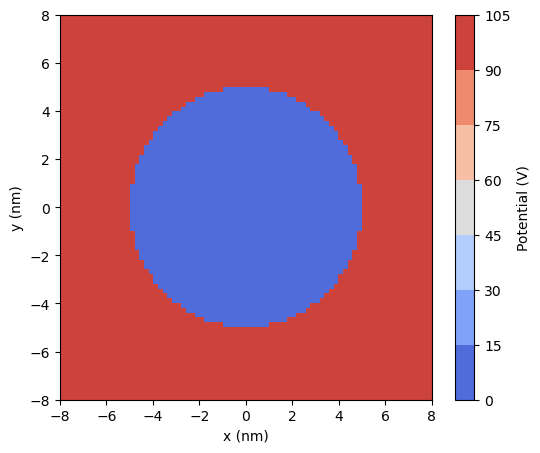

In [10]:
plt.style.use('default')
# plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize = (6,5))
con = ax.contourf(xx, yy, bandedge, cmap = 'coolwarm')
cbar = plt.colorbar(con)
cbar.set_label('Potential (V)')
ax.set_xlabel('x (nm)')
ax.set_ylabel('y (nm)')
fig
# plt.savefig('./Images/bandstructure.png', dpi = 2000)

In [11]:
bandedge1D = nn.DataFile(kp8Folder.go_to('bias_00000', 'bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'), product = software).variables['Band_Edge'].value
y = nn.DataFile(kp8Folder.go_to('bias_00000', 'bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'), product = software).coords['y'].value

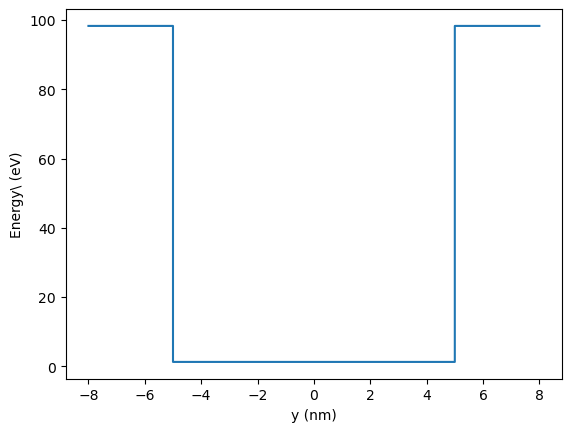

In [12]:
fig, ax = plt.subplots()
ax.plot(y, bandedge1D)
ax.set_xlabel('y (nm)')
ax.set_ylabel(r'Energy\ (eV)')
fig
# plt.savefig('./Images/1dbandedge.png', dpi = 2000)

Combining the two plots into one

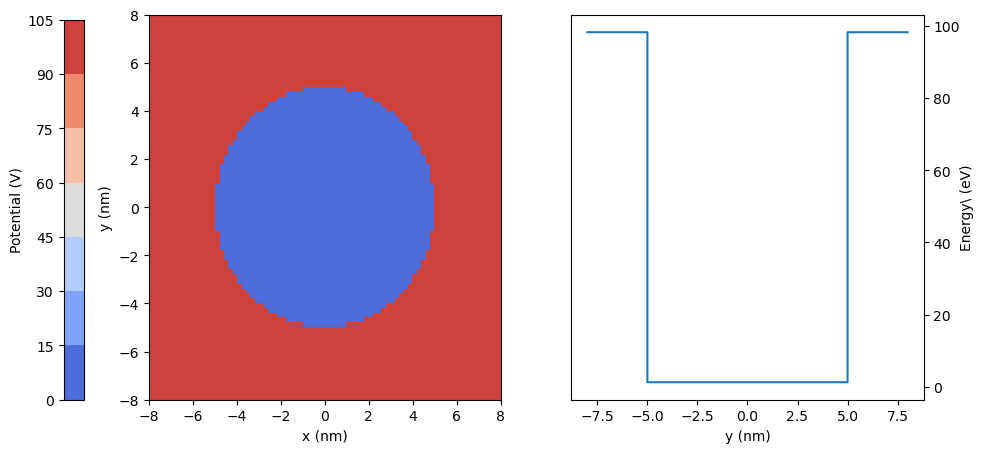

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
con = ax1.contourf(xx, yy, bandedge, cmap = 'coolwarm')
cbaxes = fig.add_axes([0.04, 0.11, 0.02, 0.76]) 
cbar = plt.colorbar(con, cax = cbaxes)
cbar.ax.yaxis.set_ticks_position('left')
cbar.set_label('Potential (V)', labelpad = -53)
ax1.set_xlabel('x (nm)')
ax1.set_ylabel('y (nm)')

ax2.plot(y, bandedge1D)
ax2.set_xlabel('y (nm)')
ax2.set_ylabel(r'Energy\ (eV)', loc = 'center', labelpad = -290)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.tick_right()

fig
# plt.savefig('./Images/combinedBandedge.png', dpi = 2000)

## Absorbtion

In [14]:
df_x = nn.DataFile(kp8Folder.go_to('bias_00000', 'OpticsQuantum', "quantum_region", 'absorption_coeff_spectrum_x_eV.dat'), product = software)
df_y = nn.DataFile(kp8Folder.go_to('bias_00000', 'OpticsQuantum', "quantum_region", 'absorption_coeff_spectrum_y_eV.dat'), product = software)
df_z = nn.DataFile(kp8Folder.go_to('bias_00000', 'OpticsQuantum', "quantum_region", 'absorption_coeff_spectrum_z_eV.dat'), product = software)

We want to plot the absorption for each polarisation direction, so we get the data for the x, y and z directions

In [15]:
E = df_x.coords['Energy'].value
aX = df_x.variables[0].value
aY = df_y.variables[0].value
aZ = df_z.variables[0].value

### Getting the peaks of absorption

We can use a <code>SciPy</code> package to find the peaks of the absorption spectrum. This will help us in identifying the eigenenergies for the bands. It is not stricly necessary to find the peaks using <code>SciPy</code>, but it will aid the plotting of graphs.

In [16]:
from scipy.signal import find_peaks

In [17]:
peaks, _ = find_peaks(aY, height = 0)
peaks

array([1752, 2024, 3070, 3088, 3281, 3828, 4476, 4717, 5046, 5266, 5592,
       6737, 7050, 7136, 8069, 8166], dtype=int64)

Get the first peak value

In [18]:
aY[peaks][0]

10912.53

Get the highest peak

In [19]:
np.max(aY[peaks])

10912.53

Get the corresponding index


In [20]:
np.where(aY == np.max(aY[peaks]))

(array([1752], dtype=int64),)

In [21]:
E[peaks]

array([1.6752, 1.7024, 1.807 , 1.8088, 1.8281, 1.8828, 1.9476, 1.9717,
       2.0046, 2.0266, 2.0592, 2.1737, 2.205 , 2.2136, 2.3069, 2.3166])

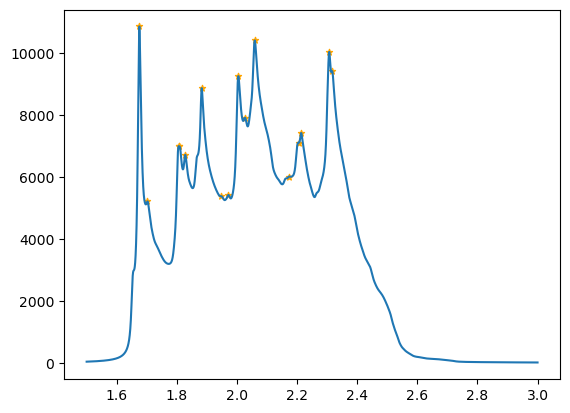

In [22]:
fig,ax = plt.subplots()
ax.plot(E, aX)
ax.scatter(E[peaks], aX[peaks], marker = '*',s = 20,color = 'orange')
fig

### Plotting the absorption

We plot the polarisation for all directions onto a single graph, and then we identify the peaks of interest and find its corresponding energies on the x-axis.

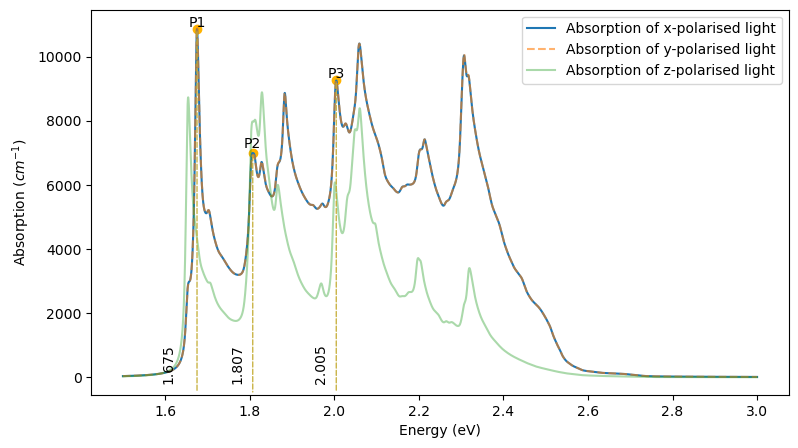

In [23]:
fig, ax = plt.subplots(1, figsize = (9,5))

ax.set_xlabel('Energy (eV)')
ax.set_ylabel(r'Absorption $(cm ^{-1})$')

##FIRST PEAK
# ax.axvline(E[peaks][0], ymax = 0.85, color = 'r', ls = '--')
# ax.text(E[peaks][0] - 0.03, +150, str(E[peaks][0]), transform = ax.transData, ha='right')
# ax.text(1.5, a[peaks][0] + 200, str(a[peaks][0]), transform = ax.transData)

ax1, = ax.plot(E, aX, alpha = 1)
ax2, = ax.plot(E, aY, '--', alpha = 0.6)
ax3, = ax.plot(E, aZ, alpha = 0.4)


temp = 0
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+200, 'P1', ha= 'center', va = 'center')
ax.text(E[peaks][temp]-0.05, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

temp = 2
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+300, 'P2', ha= 'center', va=  'center')
ax.text(E[peaks][temp]-0.02, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

temp = 8
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+200, 'P3', ha= 'center', va = 'center')
ax.text(E[peaks][temp]-0.02, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

##Biggest peak
# ax.scatter(E[peaks][np.argmax(a[peaks])], a[peaks][np.argmax(a[peaks])], color = 'orange')
# ax.annotate(text = '', xy = (E[peaks][np.argmax(a[peaks])], ax.get_ylim()[0]), xytext = (E[peaks][np.argmax(a[peaks])], a[peaks][np.argmax(a[peaks])]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = 'red'))
# ax.text(E[np.where(a == np.max(a[peaks]))]+0.05, np.max(a[peaks]) - 100, str(np.max(a[peaks])),transform = ax.transData)
# ax.text(E[peaks][np.argmax(a[peaks])] - 0.02, -100, str(E[peaks][np.argmax(a[peaks])]), transform = ax.transData, rotation = 90, ha = 'right')


titles = []
l = ['x', 'y', 'z']
for item in l:
    titles.append('Absorption of '+str(item) +'-polarised light')

plt.legend([ax1, ax2, ax3], titles)
# plt.savefig('./Images/absorption.png', dpi = 2000)
fig

We can identify the transitions that give us the energies in the graph above by analysing the <code>.txt</code> file that outputs the energies and the intensity of these transitions.

In [24]:
import pandas as pd

In [25]:
transitionsdata = kp8Folder.go_to('bias_00000', 'OpticsQuantum', "quantum_region", "kp8_kp8", 'transitions_x.txt')
df = pd.read_csv(transitionsdata, sep=r"\s+")
df.head()

,From,To,FromQM,ToQM,Energy_k0[eV],|<From|To>|[hbar/nm],|<From|To>|^2[hbar^2/nm^2],Intensity_k0[eV],ImpEps_Strength,Radiative_Strength[1/s]
0,1,21,1,21,1.74842,0.056449,0.003187,0.001593,0.000008,120876.0
1,1,22,1,22,1.74842,0.317238,0.100640,0.050320,0.000248,3817640.0
2,1,23,1,23,1.88544,0.427830,0.183038,0.091519,0.000387,7487470.0
3,1,24,1,24,1.88544,0.542012,0.293777,0.146888,0.000621,12017400.0
4,1,25,1,25,1.88628,0.293292,0.086020,0.043010,0.000182,3520360.0


We want to find all transitions that has energies near P1 (1.675 eV). We use [operations on DataFrames](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) to identify the values of interest.

In [26]:
energyrange = 0.01
energycenter = 1.675
df1 = df[(df['Energy_k0[eV]'] < (energycenter + energyrange)) & (df['Energy_k0[eV]'] > (energycenter - energyrange))].sort_values(by = 'Energy_k0[eV]').head(10000)
df1

highlight = lambda x : ['background: yellow' if (x.name == 278) else ('') for i in x]

df1.style.apply(highlight, axis = 1)

,From,To,FromQM,ToQM,Energy_k0[eV],||[hbar/nm],||^2[hbar^2/nm^2],Intensity_k0[eV],ImpEps_Strength,Radiative_Strength[1/s]
278,15,21,15,21,1.674370,3.568650,12.735300,6.367640,0.034162,462636000.000000
279,15,22,15,22,1.674370,2.677080,7.166780,3.583390,0.019225,260348000.000000
298,16,21,16,21,1.674370,2.677080,7.166780,3.583390,0.019225,260348000.000000
299,16,22,16,22,1.674370,3.568650,12.735300,6.367640,0.034162,462636000.000000


We observe that the transition at P1 is from the 15th state (5th highest valence band) to the 21st state (lowest conduction band). This is identified through the high <code>Intensity_k0</code> of $\sim$6.4 eV

We can conduct a similar analysis for the other peaks.

In [27]:
energycenter = 1.807
df1 = df[(df['Energy_k0[eV]'] < (energycenter + energyrange)) & (df['Energy_k0[eV]'] > (energycenter - energyrange)) ].sort_values(by = 'Energy_k0[eV]').head(10000)
highlight = lambda x : ['background: yellow' if (x.name == 323) else ('') for i in x]

df1.style.apply(highlight, axis = 1)

,From,To,FromQM,ToQM,Energy_k0[eV],||[hbar/nm],||^2[hbar^2/nm^2],Intensity_k0[eV],ImpEps_Strength,Radiative_Strength[1/s]
320,17,23,17,23,1.801790,1.927770,3.716290,1.858150,0.008609,145275000.000000
321,17,24,17,24,1.801790,1.593310,2.538630,1.269310,0.005881,99238700.000000
340,18,23,18,23,1.801790,1.593300,2.538620,1.269310,0.005881,99238500.000000
341,18,24,18,24,1.801790,1.927770,3.716310,1.858150,0.008609,145276000.000000
322,17,25,17,25,1.802620,0.444554,0.197629,0.098814,0.000457,7729180.000000
323,17,26,17,26,1.802620,2.117030,4.481810,2.240900,0.010373,175282000.000000
342,18,25,18,25,1.802620,2.117030,4.481800,2.240900,0.010373,175282000.000000
343,18,26,18,26,1.802620,0.444551,0.197625,0.098813,0.000457,7729050.000000
280,15,23,15,23,1.811390,0.595297,0.354378,0.177189,0.000812,13927000.000000
281,15,24,15,24,1.811390,0.243739,0.059409,0.029704,0.000136,2334760.000000


In [28]:
energycenter = 2.005
df1 = df[(df['Energy_k0[eV]'] < (energycenter + energyrange)) & (df['Energy_k0[eV]'] > (energycenter - energyrange)) & (df['Intensity_k0[eV]'] > 1)].sort_values(by = 'Energy_k0[eV]').head(10000)

highlight = lambda x : ['background: yellow' if (x.name == 166 or x.name == 167) else ('') for i in x]

df1.style.apply(highlight, axis = 1)

,From,To,FromQM,ToQM,Energy_k0[eV],||[hbar/nm],||^2[hbar^2/nm^2],Intensity_k0[eV],ImpEps_Strength,Radiative_Strength[1/s]
166,9,27,9,27,2.001960,1.691990,2.862810,1.431410,0.005372,124345000.000000
167,9,28,9,28,2.001960,1.768750,3.128480,1.564240,0.005870,135884000.000000
185,10,27,10,27,2.001960,1.768750,3.128480,1.564240,0.005870,135884000.000000
186,10,28,10,28,2.001960,1.691980,2.862810,1.431410,0.005372,124345000.000000


The highlighted values best match the peaks observed on the absorption against energy graph.

## Occupation

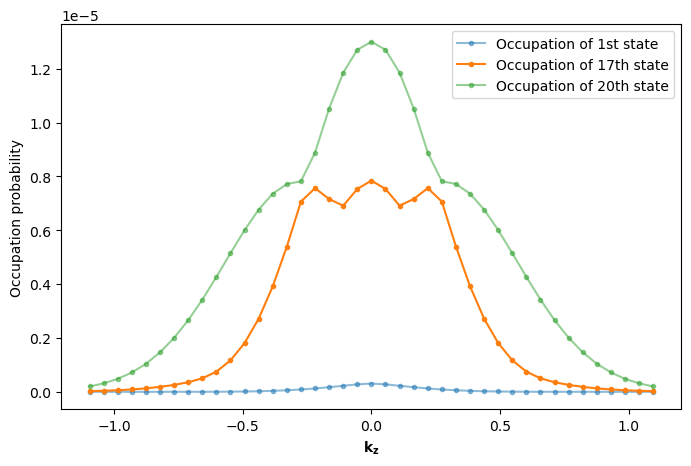

In [29]:
occu1 = nn.DataFile(kp8Folder.go_to('bias_00000', 'OpticsQuantum', "quantum_region", "kp8_kp8", 'occupation_dispersion_0001.dat'), product = software).variables['occupation'].value
occu2 = nn.DataFile(kp8Folder.go_to('bias_00000', 'OpticsQuantum', "quantum_region", "kp8_kp8", 'occupation_dispersion_0017.dat'), product = software).variables['occupation'].value
occu3 = nn.DataFile(kp8Folder.go_to('bias_00000', 'OpticsQuantum', "quantum_region", "kp8_kp8", 'occupation_dispersion_0020.dat'), product = software).variables['occupation'].value
kx = nn.DataFile(kp8Folder.go_to('bias_00000', 'OpticsQuantum', "quantum_region", "kp8_kp8", 'occupation_dispersion_0001.dat'), product = software).coords['kx'].value

fig, ax = plt.subplots(1, figsize = (8,5))
markersize = 3

occuplt1,  = ax.plot(kx, occu1, '-o', markersize = markersize, alpha = 0.5)
occuplt2,  = ax.plot(kx, occu2, '-o', markersize = markersize)
occuplt3,  = ax.plot(kx, occu3, '-o', markersize = markersize, alpha = 0.5)

ax.legend([occuplt1, occuplt2, occuplt3], ['Occupation of 1st state', 'Occupation of 17th state', 'Occupation of 20th state'])

ax.set_xlabel(r'$\mathbf{k_z}$')
ax.set_ylabel('Occupation probability')
fig
# plt.savefig('./Images/occupation.png', dpi = 2000)

## Eigenstates

To plot the eigenstates of the single band calculation, we use the variable <code>singlebanddata</code> instead. We want to visualise the eigenstates and wavefunction amplitudes in 3D. For this, we will require an additional package.

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

These files are chosen to find consecutive excited states. Degenerate states are skipped.

In [31]:
singleFolder = nn.DataFolder(inputfile_single.folder_output)

In [32]:
singleFolder.show_tree()

2Dcircular_infinite_wire_GaAs_inter_nnp_0/
    Structure/
        alloy_composition.vtr
        alloy_composition_1d_horizontal_slice_middle_along_y.dat
        alloy_composition_1d_vertical_slice_middle_along_x.dat
        material_indices.txt
        materials.vtr
        materials_1d_horizontal_slice_middle_along_y.dat
        materials_1d_vertical_slice_middle_along_x.dat
        regions_all.vtr
        regions_all_1d_horizontal_slice_middle_along_y.dat
        regions_all_1d_vertical_slice_middle_along_x.dat
        regions_material.vtr
        regions_material_1d_horizontal_slice_middle_along_y.dat
        regions_material_1d_vertical_slice_middle_along_x.dat
    bias_00000/
        OpticsQuantum/
            quantum_region/
                absorption_coeff_spectrum_x_eV.dat
                absorption_coeff_spectrum_y_eV.dat
                absorption_coeff_spectrum_z_eV.dat
                im_epsilon_spectrum_x_eV.dat
                im_epsilon_spectrum_y_eV.dat
                

In [33]:
singleFolder.go_to('bias_00000', 'Quantum', "quantum_region", "Gamma")

DataFolder
fullpath: C:\Users\Heorhii\Documents\nextnano\OutputNnpy\2Dcircular_infinite_wire_GaAs_inter_nnp_0\bias_00000\Quantum\quantum_region\Gamma
Folders: 0
Files:
['amplitudes_k00000.vtr', 'amplitudes_k00000_1d_horizontal_slice_middle_along_y.dat', 'amplitudes_k00000_1d_vertical_slice_middle_along_x.dat', 'amplitudes_shift_k00000.vtr', 'amplitudes_shift_k00000_1d_horizontal_slice_middle_along_y.dat', 'amplitudes_shift_k00000_1d_vertical_slice_middle_along_x.dat', 'energy_spectrum_k00000.dat', 'occupation.dat', 'probabilities_k00000.vtr', 'probabilities_k00000_1d_horizontal_slice_middle_along_y.dat', 'probabilities_k00000_1d_vertical_slice_middle_along_x.dat', 'probabilities_shift_k00000.vtr', 'probabilities_shift_k00000_1d_horizontal_slice_middle_along_y.dat', 'probabilities_shift_k00000_1d_vertical_slice_middle_along_x.dat']

In [34]:
ampData = nn.DataFile(singleFolder.go_to('bias_00000', 'Quantum', "quantum_region", "Gamma", 'amplitudes_k00000.vtr'), product = software)

for i in range(1,7):
    exec(f'psi{i} = ampData.variables["Psi_{i}"].value')

In [35]:
eigenX = ampData.coords['x'].value
eigenY = ampData.coords['y'].value
XX, YY = np.meshgrid(eigenX, eigenY)

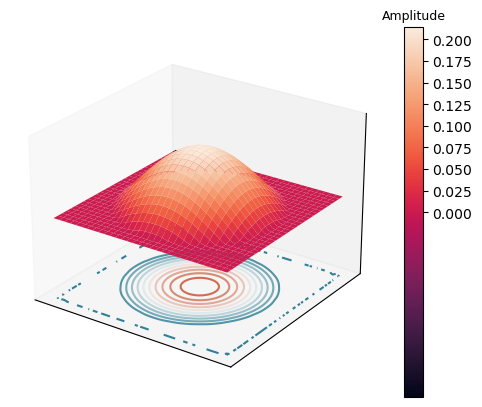

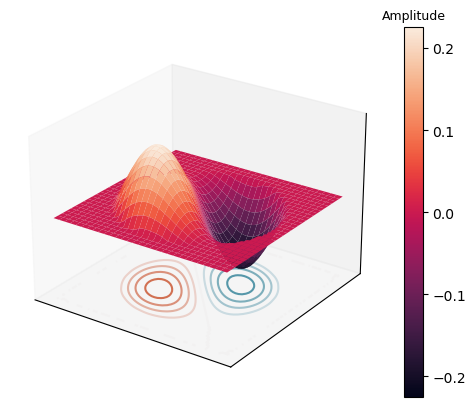

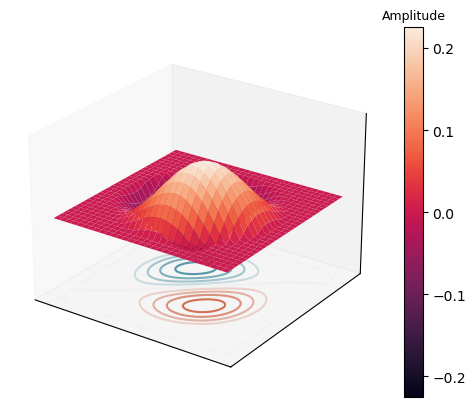

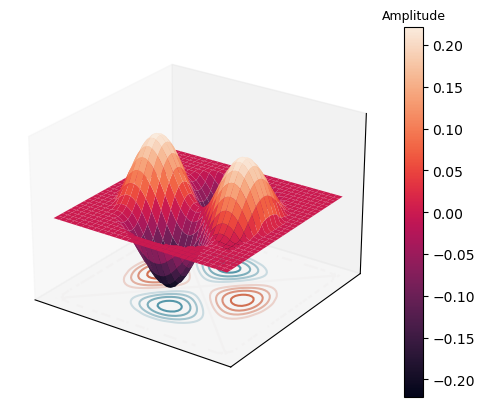

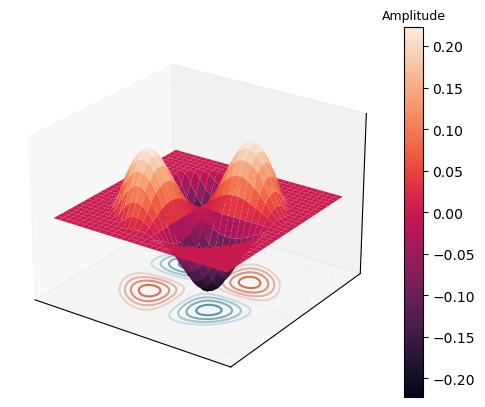

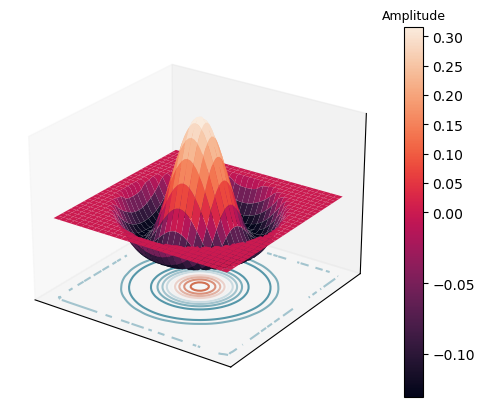

In [36]:
plt.close('all') # close figures drawn before
c1 = sns.color_palette("rocket", as_cmap=True)

offset = np.zeros(6) - 0.3
for i in range(1,7):
    divnorm = colors.TwoSlopeNorm(vcenter = 0)
    
    fig, ax = plt.subplots(subplot_kw = {'projection' : '3d'})
    exec(f'psi = psi{i}')
    surf = ax.plot_surface(XX, YY, psi, cmap = c1, norm = divnorm)
    cbar = plt.colorbar(surf)
    cbar.ax.set_title('Amplitude', fontsize = 9)
    ax.tick_params(labelbottom=False, labelleft=False)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.zaxis.set_ticks([])
    ax.view_init(25, 90+35)
    ax.set_zlim(-0.3,0.3)
    ax.contour(XX, YY, psi, 10, zdir = 'z', cmap=sns.diverging_palette(220, 20, s= 85,as_cmap=True), linestyles="solid", offset= offset[i-1])

#     plt.savefig(f'./Images/psi{i}.png', dpi = 2000)

plt.show()